In [347]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

In [348]:
data_frame=pd.read_csv("50_Startups.csv")
data_frame.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

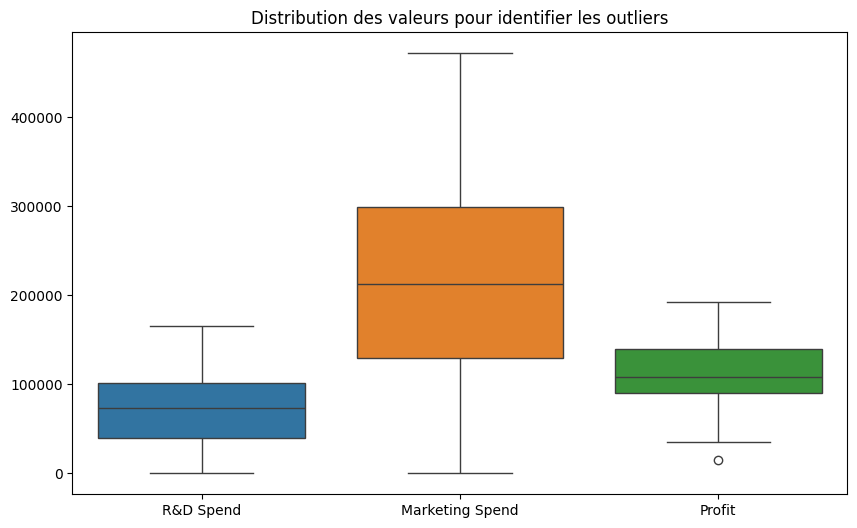

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame[['R&D Spend', 'Marketing Spend', 'Profit',"State"]])
plt.title("Distribution des valeurs pour identifier les outliers")
plt.show()


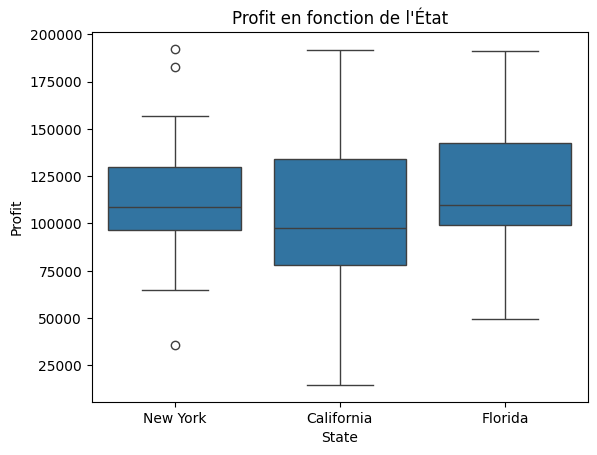

In [350]:
sns.boxplot(x=data_frame["State"], y=data_frame["Profit"])
plt.title("Profit en fonction de l'État")
plt.show()

In [351]:
non_cat_data_frame=pd.get_dummies(data_frame,columns=["State"],drop_first=True).astype(int)

In [352]:
non_cat_data_frame

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [353]:
non_cat_data_frame.isna().any()
non_cat_data_frame.duplicated().any()

False

In [354]:
x=data_frame.drop(columns=["Profit","State"])
y=data_frame["Profit"]



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [355]:

x_train=tf.constant(x_train)
x_test=tf.constant(x_test)
y_train=tf.constant(y_train)
y_test=tf.constant(y_test)

In [356]:

r_scaler=RobustScaler()
scaler=StandardScaler()
ss_xtrain=scaler.fit_transform(x_train)
ss_xtest=scaler.transform(x_test)
ss_ytrain=scaler.fit_transform(tf.reshape(y_train,(-1,1)))
ss_ytest=scaler.transform(tf.reshape(y_test,(-1,1)))
print(type(ss_xtest),type(ss_ytest))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [357]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

reg_model=Sequential([
    Dense(1,input_shape=(x_train.shape[1],))
])
reg_model.compile(
    optimizer=Adam(learning_rate=0.3),
    metrics=["mae"],
    loss="mse"
)

early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)



reg_model.fit(ss_xtrain,ss_ytrain,epochs=10,verbose=1,validation_data=(ss_xtest,ss_ytest),callbacks=early_stopping)





Epoch 1/10


C:\Users\izuna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.5759 - mae: 0.6407 - val_loss: 0.4091 - val_mae: 0.5531
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3212 - mae: 0.4481 - val_loss: 0.8133 - val_mae: 0.6418
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5069 - mae: 0.5673 - val_loss: 0.5493 - val_mae: 0.4906
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3691 - mae: 0.5142 - val_loss: 0.2803 - val_mae: 0.4153
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3040 - mae: 0.4821 - val_loss: 0.1629 - val_mae: 0.3233
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1986 - mae: 0.3763 - val_loss: 0.1322 - val_mae: 0.2802
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1686 - mae: 0.3372 - val_loss: 0.1383 - val_mae: 0.3044
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2087 - mae: 0.4043 - val_loss: 0.1323 - val_mae: 0.3157
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1820 - mae: 0.3849 - val_loss: 

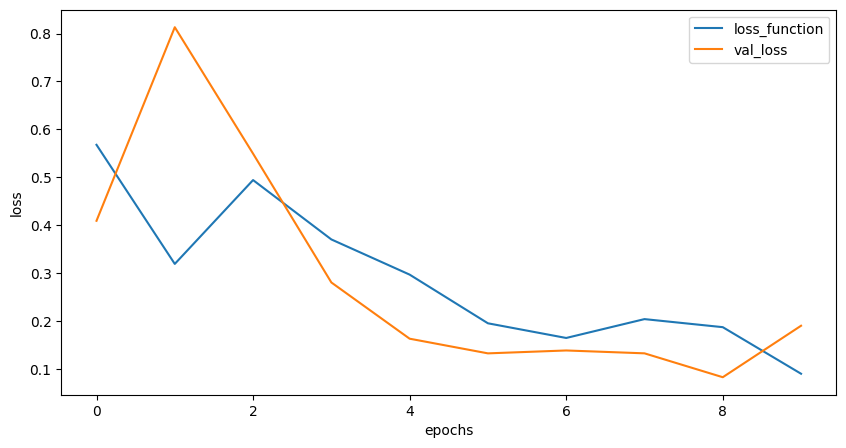

In [358]:
epochs=reg_model.history.epoch
loss=reg_model.history.history["loss"]
val_loss=reg_model.history.history["val_loss"]
fig,axe=plt.subplots(figsize=(10,5))
axe.plot(epochs,loss,label="loss_function")
axe.plot(epochs,val_loss,label="val_loss")
axe.set_xlabel("epochs")
axe.set_ylabel("loss")
axe.legend()



In [359]:
r_scaler=RobustScaler()
scaler=StandardScaler()
rs_xtrain=r_scaler.fit_transform(x_train)
rs_xtest=r_scaler.transform(x_test)
rs_ytrain=r_scaler.fit_transform(tf.reshape(y_train,(-1,1)))
rs_ytest=r_scaler.transform(tf.reshape(y_test,(-1,1)))



reg_model.fit(ss_xtrain,rs_ytrain,epochs=50,verbose=1,validation_data=(rs_xtest,rs_ytest))

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0973 - mae: 0.2530 - val_loss: 0.1648 - val_mae: 0.2977
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0938 - mae: 0.2444 - val_loss: 0.2722 - val_mae: 0.3721
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1367 - mae: 0.3008 - val_loss: 0.3048 - val_mae: 0.4077
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1244 - mae: 0.2833 - val_loss: 0.2524 - val_mae: 0.3971
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0915 - mae: 0.2252 - val_loss: 0.1385 - val_mae: 0.2965
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0420 - mae: 0.1401 - val_loss: 0.0898 - val_mae: 0.2396
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0619 - mae: 0.2101 - val_loss: 0.1139 - val_mae: 0.2910
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1228 - mae: 0.2878 - val_loss: 0.1065 - val_mae: 0.2689
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0945 - mae: 0.2533 - 

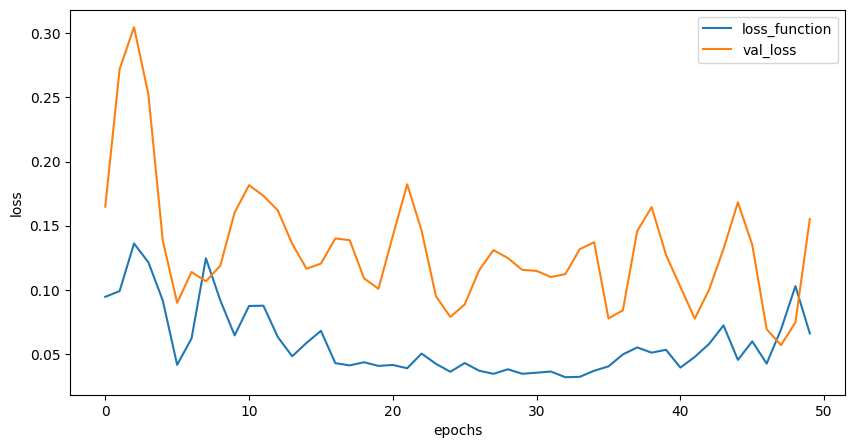

In [360]:
epochs=reg_model.history.epoch
loss=reg_model.history.history["loss"]
val_loss=reg_model.history.history["val_loss"]
fig,axe=plt.subplots(figsize=(10,5))
axe.plot(epochs,loss,label="loss_function")
axe.plot(epochs,val_loss,label="val_loss")
axe.set_xlabel("epochs")
axe.set_ylabel("loss")
axe.legend()